### FERRAMENTAS DA QUALIDADE - CARTAS DE CONTROLE

In [1]:
setwd("C:/Ferramentas_Qualidade")
getwd()

[1] "C:/Ferramentas_Qualidade"

In [2]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)
# DESATIVA NOTAÇÃO CIENTÍFICA
options(scipen = 999)
# PARA TAMANHO DOS GRÁFICOS
options(jupyter.plot_scale = 1)

In [87]:
# CARREGAR BIBLIOTECAS
suppressPackageStartupMessages({
library(dplyr)
library(ggplot2)
library(cowplot)
library(RcmdrMisc)
library(readxl)})

### CARTA X e R (MÉDIA E AMPLITUDE) 

#### 1 - COLETA DE DADOS FORMANDO 25 SUBGRUPOS OU AMOSTRAS (m) DE TAMANHO 5 (n)

#### DATASET COM O DIÂMETRO (mm) INTERNO DE ANÉIS DE PISTÃO

In [5]:
dados1 <- read.csv("C:FCD/Ferramentas_Qualidade/diametro-interno-aneis-pistaoXR.txt", header = FALSE, sep = ",",
                   col.names = c("A","B","C","D","E") )

In [6]:
df_diametro_aneis1 <- data.frame(dados1)
glimpse(df_diametro_aneis1)

Rows: 25
Columns: 5
$ A <dbl> 74.030, 73.995, 73.988, 74.002, 73.992, 74.009, 73.995, 73.985, 74.0~
$ B <dbl> 74.002, 73.992, 74.024, 73.996, 74.007, 73.994, 74.006, 74.003, 73.9~
$ C <dbl> 74.019, 74.001, 74.021, 73.993, 74.015, 73.997, 73.994, 73.993, 74.0~
$ D <dbl> 73.992, 74.011, 74.005, 74.015, 73.989, 73.985, 74.000, 74.015, 74.0~
$ E <dbl> 74.008, 74.004, 74.002, 74.009, 74.014, 73.993, 74.005, 73.988, 74.0~


#### 2 - CÁLCULO DAS MÉDIAS  E AMPLITUDE DE CADA SUBGRUPO (AMOSTRAS) E TESTE DE NORMALIDADE

In [7]:
m <- nrow(df_diametro_aneis1)
n <- ncol(df_diametro_aneis1)

In [8]:
# MÉDIA DAS AMOSTRAS
Media <- apply(df_diametro_aneis1, 1, mean)

In [9]:
# AMPLITUDE
calc_amplitude <- function(linha){
  maximo = max(linha)
  minimo = min(linha)
  amplitude = maximo - minimo
  return(amplitude)
}
Amplitude <- apply(df_diametro_aneis1, 1,calc_amplitude)

In [10]:
# TABELA COM X (MÉDIA) e R (AMPLITUDE) 
df_diametro_aneis2 <- mutate(df_diametro_aneis1, 
                             X = Media,
                             R = Amplitude)
head(df_diametro_aneis2, 5)

A,B,C,D,E,X,R
74.030,74.002,74.019,73.992,74.008,74.0102,0.038
73.995,73.992,74.001,74.011,74.004,74.0006,0.019
73.988,74.024,74.021,74.005,74.002,74.0080,0.036
74.002,73.996,73.993,74.015,74.009,74.0030,0.022
73.992,74.007,74.015,73.989,74.014,74.0034,0.026


In [88]:
# TESTE DE NORMALIDADE
normalityTest(~ X, test = "lillie.test", data = df_diametro_aneis2)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X
D = 0.075651, p-value = 0.9705


Com um p-value maior que 0.05, a hipótese alternativa (Ha) é rejeitada. Portanto a amostra provém de uma população normalmente distribuída.

#### 3 - CÁLCULO DA MÉDIA DAS MÉDIAS DOS SUBGRUPOS E MÉDIA DAS AMPLITUDES

In [11]:
Media_X <- mean(df_diametro_aneis2$X)
Media_R <- mean(df_diametro_aneis2$R)

#### 4 - CÁLCULO DO LIMITE CENTRAL (LC), LIMITE SUPERIOR CENTRAL (LSC) E LIMITE INFERIOR CENTRAL (LIC) PARA VALORES REFERÊNCIA NÃO FORNECIDOS

#### CARTA X e R (MÉDIA E AMPLITUDE)
#### CARTA X

In [20]:
# A2 É VALOR TABELADO - PODE SER BUSCADO DE FORMA DIRETA NA TABELA, PORÉM FOI UTILIZADO O FATOR d2 PARA CHEGAR A A2
# d2 É VALOR TABELADO

d2 <- 2.326
A2 <- ifelse(3/(d2*(sqrt(n))) >= 0, 3/(d2*(sqrt(n))), 0) 

XR_LC <- Media_X
XR_LSC <- Media_X + (A2*Media_R)
XR_LIC <- Media_X - (A2*Media_R)

[1] 0.5768017

#### CARTA R

In [21]:
# D3 E D4 SÃO VALORES TABELADOS - - PODEM SER BUSCADOS DE FORMA DIRETA NA TABELA, PORÉM FOI UTILIZADO O FATOR d2 e d3 PARA 
# CHEGAR A D3 e D4.
# d2 e d3 SÃO VALORES TABELADOS

d2 <- 2.326
d3 <- 0.864

D3 <- ifelse(1-(3*d3/d2) >= 0, 1-(3*d3/d2), 0) 
D4 <- ifelse(1+(3*d3/d2) >= 0, 1+(3*d3/d2), 0) 

R_LC <- Media_R
R_LSC <- Media_R*D4
R_LIC <- Media_R*D3

#### 5 - PLOTAR CARTAS X e R 

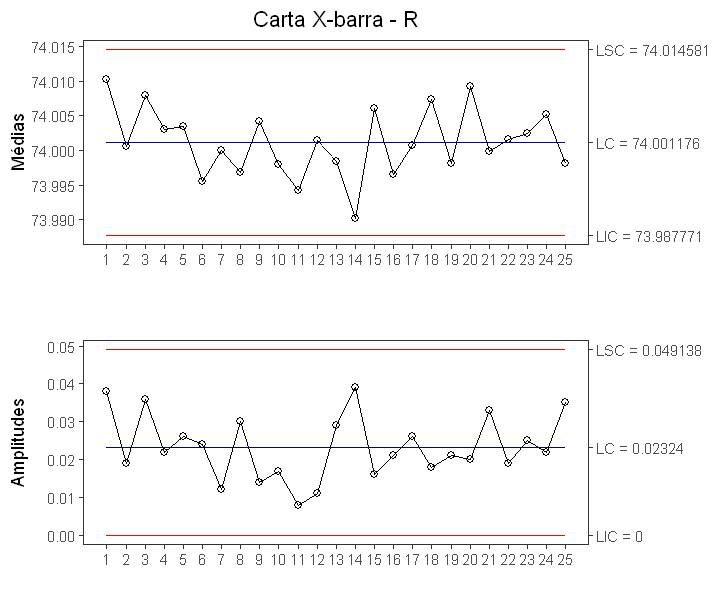

In [22]:
# CARTA X

carta_X <- ggplot() + 
  geom_point(data = df_diametro_aneis2, aes(x = 1:m, y = X), shape = 1, size = 2) +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = X)) +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = XR_LIC), colour = "red") +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = XR_LC), colour = "dark blue") +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = XR_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(XR_LIC, XR_LC, XR_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ", "LSC = "), round(b, 6))})) +
  labs(title = "Carta X-barra - R", x = "", y = "Médias") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

# CARTA R
carta_R <- ggplot() + 
  geom_point(data = df_diametro_aneis2, aes(x = 1:m, y = R), shape = 1, size = 2) +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = R)) +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = R_LIC), colour = "red") +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = R_LC), colour = "dark blue") +
  geom_line(data = df_diametro_aneis2, aes(x = 1:m, y = R_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(R_LIC, R_LC, R_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ","LSC = "), round(b, 6))})) +
  labs(x = "", y = "Amplitudes") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

options(repr.plot.width = 6, repr.plot.height = 5)
plot_grid(carta_X, carta_R, ncol = 1, align = "hv")

Não há ponto fora dos limites de controle e nenhum padrão não aleatório foi mostrado nas cartas X e R.

### CARTA X e s (MÉDIA E DESVIO PADRÃO)

#### 1 - COLETA DE DADOS FORMANDO 25 SUBGRUPOS OU AMOSTRAS (m) DE TAMANHO 10 (n)

#### DATASET COM O DIÂMETRO (mm) INTERNO DE ANÉIS DE PISTÃO

In [121]:
dados1 <- read.csv("C:/Ferramentas_Qualidade/diametro-interno-aneis-pistaoXs.txt", header = FALSE, sep = ",",
                   col.names = c("A","B","C","D","E","F","G","H","I","J") )

In [122]:
df_diametro_aneis3 <- data.frame(dados1)
glimpse(df_diametro_aneis3)

Rows: 25
Columns: 10
$ A <dbl> 74.030, 73.995, 73.988, 74.002, 73.992, 74.009, 73.995, 73.985, 74.0~
$ B <dbl> 74.002, 73.992, 74.024, 73.996, 74.007, 73.994, 74.006, 74.003, 73.9~
$ C <dbl> 74.019, 74.001, 74.021, 73.993, 74.015, 73.997, 73.994, 73.993, 74.0~
$ D <dbl> 73.992, 74.011, 74.005, 74.015, 73.989, 73.985, 74.000, 74.015, 74.0~
$ E <dbl> 74.008, 74.004, 74.002, 74.009, 74.014, 73.993, 74.005, 73.988, 74.0~
$ F <dbl> 73.992, 74.008, 73.994, 73.982, 73.994, 74.006, 73.992, 74.001, 73.9~
$ G <dbl> 73.989, 73.889, 73.998, 74.001, 73.998, 74.010, 74.007, 74.010, 74.0~
$ H <dbl> 73.996, 73.907, 73.994, 74.015, 73.994, 74.018, 74.015, 73.813, 74.0~
$ I <dbl> 74.004, 74.000, 73.995, 74.005, 73.995, 74.003, 73.989, 74.020, 73.9~
$ J <dbl> 74.0100, 73.8560, 73.9900, 73.9960, 73.9900, 74.0000, 74.0140, 74.01~


#### 2 - CÁLCULO DAS MÉDIAS  E DESVIO PADRÃO DE CADA SUBGRUPO (AMOSTRAS) E TESTE DE NORMALIDADE

In [123]:
m1 <- nrow(df_diametro_aneis3)
n1 <- ncol(df_diametro_aneis3)

In [124]:
# MÉDIA DAS AMOSTRAS
Media1 <- apply(df_diametro_aneis3, 1, mean)

In [125]:
# DESVIO PADRÃO (PARA A CARTA X e s)
Desvio_Padrao <- apply(df_diametro_aneis3, 1, sd)

In [126]:
# TABELA COM X (MÉDIA) e s (DESVIO PADRÃO) 
df_diametro_aneis4 <- mutate(df_diametro_aneis3, 
                             X1 = Media1,
                             s = Desvio_Padrao)
head(df_diametro_aneis4, 5)

A,B,C,D,E,F,G,H,I,J,X1,s
74.030,74.002,74.019,73.992,74.008,73.992,73.989,73.996,74.004,74.010,74.0042,0.013053735
73.995,73.992,74.001,74.011,74.004,74.008,73.889,73.907,74.000,73.856,73.9663,0.058347713
73.988,74.024,74.021,74.005,74.002,73.994,73.998,73.994,73.995,73.990,74.0011,0.012377848
74.002,73.996,73.993,74.015,74.009,73.982,74.001,74.015,74.005,73.996,74.0014,0.010254538
73.992,74.007,74.015,73.989,74.014,73.994,73.998,73.994,73.995,73.990,73.9988,0.009670114


In [127]:
# TESTE DE NORMALIDADE
normalityTest(~ X1, test = "lillie.test", data = df_diametro_aneis4)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X1
D = 0.22373, p-value = 0.002292


Com um p-value maior que 0.05, a hipótese alternativa (Ha) é rejeitada. Portanto a amostra provém de uma população normalmente distribuída.

#### 3 - CÁLCULO DA MÉDIA DAS MÉDIAS DOS SUBGRUPOS E MÉDIA DOS DESVIOS PADRÃO

In [30]:
Media_X1 <- mean(df_diametro_aneis4$X1)
Media_s <- mean(df_diametro_aneis4$s)

#### 4 - CÁLCULO DO LIMITE CENTRAL (LC), LIMITE SUPERIOR CENTRAL (LSC) E LIMITE INFERIOR CENTRAL (LIC) QUANDO VALORES REFERÊNCIA NÃO FORNECIDOS

#### CARTA X e s (MÉDIA e DESVIO PADRÃO)
#### CARTA X

In [42]:
# A3 É VALOR TABELADO - PODE SER BUSCADO DE FORMA DIRETA NA TABELA, PORÉM FOI UTILIZADO O FATOR c4 PARA CHEGAR A A3
# c4 É VALOR TABELADO

c4 <- 0.9727
A3 <- ifelse(3/(c4*(sqrt(n))) >= 0, 3/(c4*(sqrt(n1))), 0) 

Xs_LC <- Media_X1
Xs_LSC <- Media_X1 + (A3*Media_s)
Xs_LIC <- Media_X1 - (A3*Media_s)

#### CARTA s

In [41]:
# B3 E B4 SÃO VALORES TABELADOS - - PODEM SER BUSCADOS DE FORMA DIRETA NA TABELA, PORÉM FOI UTILIZADO O FATOR c4 PARA 
# CHEGAR A B3 e B4.
# c4 É VALOR TABELADO

c4 <- 0.9727

B3 <- ifelse(1-(3*(sqrt((1-(c4**2))))/c4) >= 0, 1-(3*(sqrt((1-(c4**2))))/c4), 0) 
B4 <- ifelse(1+(3*(sqrt((1-(c4**2))))/c4) >= 0, 1+(3*(sqrt((1-(c4**2))))/c4), 0) 

s_LC <- Media_s
s_LSC <- Media_s*B4
s_LIC <- Media_s*B3

#### 5 - PLOTAR CARTA X e s 

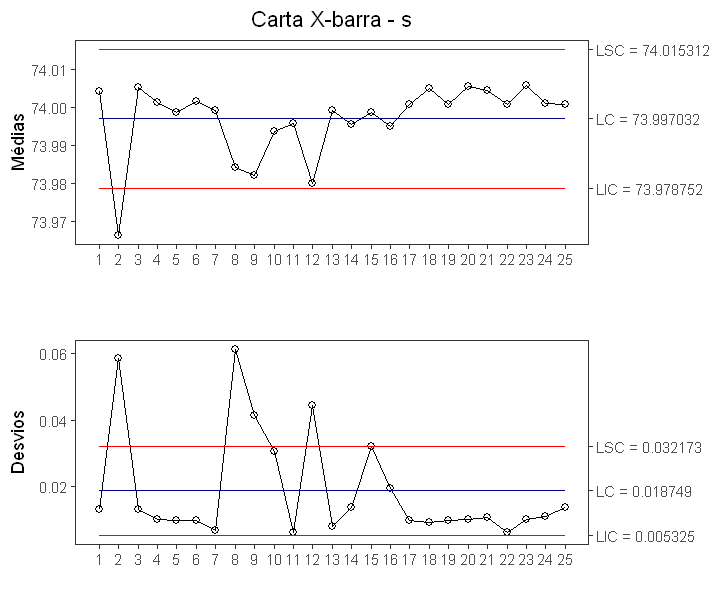

In [40]:
# CARTA X

carta_X1 <- ggplot() + 
  geom_point(data = df_diametro_aneis4, aes(x = 1:m, y = X1), shape = 1, size = 2) +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = X1)) +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = Xs_LIC), colour = "red") +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = Xs_LC), colour = "dark blue") +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = Xs_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(Xs_LIC, Xs_LC, Xs_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ","LSC = "), round(b, 6))})) +
  labs(title = "Carta X-barra - s", x = "", y = "Médias") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

# CARTA s
carta_s <- ggplot() + 
  geom_point(data = df_diametro_aneis4, aes(x = 1:m, y = s), shape = 1, size = 2) +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = s)) +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = s_LIC), colour = "red") +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = s_LC), colour = "dark blue") +
  geom_line(data = df_diametro_aneis4, aes(x = 1:m, y = s_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(s_LIC, s_LC, s_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ","LSC = "), round(b, 6))})) +
  labs(x = "", y = "Desvios") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

options(repr.plot.width = 6, repr.plot.height = 5)
plot_grid(carta_X1, carta_s, ncol = 1, align = "hv")

Na carta X-barra há um ponto fora dos limite inferior de controle e uma tendência com 9 pontos consecutivos mesmo lado do Limite de Controle. Portanto há necessidade de investigação da causa e ação corretiva.

Na carta s, há 4 pontos fora do limite superior de controle. Portanto há necessidade de investigação da causa e ação corretiva.



### CARTA I e MR (VALORES INDIVIDUAIS E AMPLITUDE MÓVEL)

#### 1 - COLETA DE DADOS FORMANDO 30 SUBGRUPOS OU AMOSTRAS (m) DE TAMANHO 1 (n)

In [98]:
dados2 <- read.csv("C:/Ferramentas_Qualidade/viscosidade-tinta-base-avioes.txt", header = FALSE, sep = ",",
                   col.names = c("Lote","Viscosidade") )

In [99]:
df_viscosidade <- data.frame(dados2)
glimpse(df_viscosidade)

Rows: 30
Columns: 2
$ Lote        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,~
$ Viscosidade <dbl> 33.75, 33.05, 33.05, 34.00, 33.81, 33.46, 34.02, 33.68, 33~


In [104]:
# TESTE DE NORMALIDADE
normalityTest(~ Viscosidade, test = "lillie.test", data = df_viscosidade)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  Viscosidade
D = 0.11976, p-value = 0.3326


Com um p-value maior que 0.05, a hipótese alternativa (Ha) é rejeitada. Portanto a amostra provém de uma população normalmente distribuída.

#### 2 - CÁLCULO DA MÉDIA DOS SUBGRUPOS (AMOSTRAS) E CÁLCULO DE AMPLITUDE MÓVEL 

In [100]:
m2 <- nrow(df_viscosidade)
n2 <- ncol(df_viscosidade)

In [101]:
# MÉDIA DAS AMOSTRAS
Media_I <- mean(df_viscosidade$Viscosidade)

In [102]:
# CÁLCULO DA AMPLITUDE MÓVEL
i <- 0
vetor_mr <- c(NA)
while (i <= m2){
    i = i + 1
    if (i == 30){
        break
    }
    valor = abs(df_viscosidade[i, 2] - df_viscosidade[i+1, 2])
    vetor_mr = append(vetor_mr, valor)
}

df_viscosidade$MR <- vetor_mr

#### 3 - CÁLCULO DA MÉDIA DA AMPLITUDE MÓVEL

In [80]:
Media_MR <- mean(df_viscosidade$MR, na.rm = TRUE)

#### 4 - CÁLCULO DO LIMITE CENTRAL (LC), LIMITE SUPERIOR CENTRAL (LSC) E LIMITE INFERIOR CENTRAL (LIC) QUANDO VALORES REFERÊNCIA NÃO FORNECIDOS

#### CARTA I e MR (VALORES INDIVIDUAIS E AMPLITUDE)
#### CARTA I

In [81]:
# E2 É VALOR TABELADO - PODE SER BUSCADO DE FORMA DIRETA NA TABELA, PORÉM FOI UTILIZADO O FATOR d2 PARA CHEGAR A E2
# d2 É VALOR TABELADO

d2 <- 1.128
E2 <- ifelse(3/d2 >= 0, 3/d2, 0) 
  
IMR_LC <- Media_I
IMR_LSC <- Media_I + (E2*Media_MR)
IMR_LIC <- Media_I - (E2*Media_MR)

#### CARTA MR

In [82]:
# D3 E D4 SÃO VALORES TABELADOS - PODEM SER BUSCADOS DE FORMA DIRETA NA TABELA, PORÉM FORAM UTILIZADOS OS FATORES d2 e d3 PARA 
# CHEGAR A D3 e D4.
# d2 e d3 SÃO VALORES TABELADOS

d2 <- 1.128
d3 <- 0.853

D4 <- ifelse(1+(3*d3/d2) >= 0, 1+(3*d3/d2), 0) 
D3 <- ifelse(1-(3*d3/d2) >= 0, 1-(3*d3/d2), 0) 

MR_LC <- Media_MR
MR_LSC <- Media_MR*D4
MR_LIC <- Media_MR*D3

#### 5 - PLOTAR CARTA I e MR 

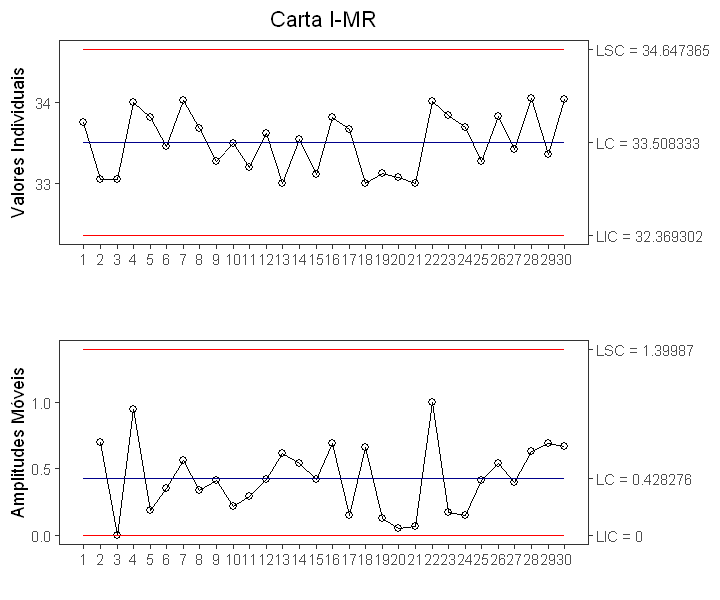

In [83]:
# CARTA I

carta_I <- ggplot() + 
  geom_point(data = df_viscosidade, aes(x = 1:m2, y = Viscosidade), shape = 1, size = 2) +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = Viscosidade)) +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = IMR_LIC), colour = "red") +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = IMR_LC), colour = "dark blue") +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = IMR_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m2)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(IMR_LIC, IMR_LC, IMR_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ","LSC = "), round(b, 6))})) +
  labs(title = "Carta I-MR", x = "", y = "Valores Individuais") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

# CARTA MR
carta_MR <- ggplot() + 
  geom_point(data = df_viscosidade, aes(x = 1:m2, y = MR), shape = 1, size = 2) +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = MR)) +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = MR_LIC), colour = "red") +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = MR_LC), colour = "dark blue") +
  geom_line(data = df_viscosidade, aes(x = 1:m2, y = MR_LSC), colour = "red") +
  scale_x_continuous(breaks = c(1:m2)) +
  scale_y_continuous(sec.axis = sec_axis(trans = ~., 
                                         breaks = c(MR_LIC, MR_LC, MR_LSC),
                                         labels = function(b){paste0(c("LIC = ","LC = ","LSC = "), round(b, 6))})) +
  labs(x = "", y = "Amplitudes Móveis") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), panel.grid.major = element_blank(), panel.grid.minor = element_blank())

options(repr.plot.width = 6, repr.plot.height = 5)
plot_grid(carta_I, carta_MR, ncol = 1, align = "hv")

O processo está fora de controle, pois há padrões não aleatórios.

#### REFERÊNCIAS

CARUSO, M.S.F.; GRANATO, D.; OLIVEIRA, C.C.; SAKUMA, A.M. **Manual para elaboração de cartas de controle 
para monitoramento de processos de medição quantitativos em laboratórios de ensaio**. São Paulo: Secretaria de Estado da Saúde SES/SP, 2013. Disponível em: < http://www.ial.sp.gov.br/resources/editorinplace/ial/2016_3_19/manual-carta-controle_ial_2013.pdf?attach=true >. Acesso em: 27 dezembro 2021.


